In [25]:

import random
import csv

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

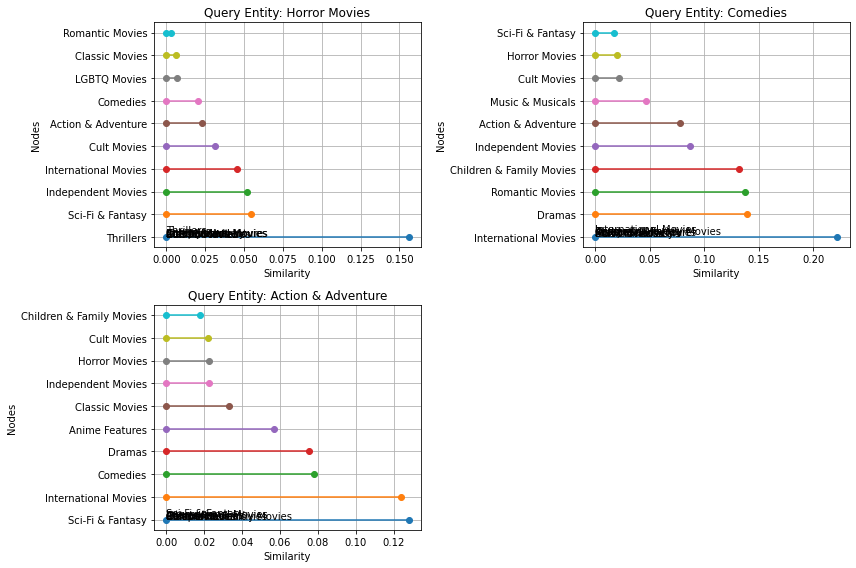

In [26]:


# Load the CSV file into a DataFrame with the appropriate encoding
df = pd.read_csv("/Users/kareemkassamia/Downloads/netflix_titles.csv", encoding="ISO-8859-1")

# Remove rows with NaN values in the "listed_in" and "title" columns
df = df.dropna(subset=["listed_in", "title"])

# Create an empty graph
g = nx.Graph()

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    title_id = row["show_id"]
    title_name = row["title"]
    
    # Check if the listed_in data is not NaN and split it by comma to get categories
    if not pd.isna(row["listed_in"]):
        categories_data = row["listed_in"].split(", ")  # Assuming categories are separated by commas in the CSV
        
        # Create a node for each category
        for category_name in categories_data:
            g.add_node(category_name)
        
        # Create a node for the movie title and set the 'title' attribute
        g.add_node(title_id, title=title_name)
        
        # Add an edge between the movie title node and each category node
        for category_name in categories_data:
            g.add_edge(title_id, category_name)

# Function to calculate similarity between nodes
def calculate_similarity(node_id, graph):
    similarities = {}
    neighbors = set(graph.neighbors(node_id))
    for node in graph.nodes():
        if node != node_id:
            node_neighbors = set(graph.neighbors(node))
            similarity = len(neighbors.intersection(node_neighbors)) / len(neighbors.union(node_neighbors))
            similarities[node] = similarity
    return similarities

# Example usage to find similarity for specific nodes
query_entities = ["Horror Movies", "Comedies", "Action & Adventure"]
top_k = 10  # How many of the most similar nodes to plot

# Create a figure for the graph
plt.figure(figsize=(12, 8))

# Plot each query entity with its most similar nodes
for idx, query_entity in enumerate(query_entities, 1):
    plt.subplot(2, 2, idx)
    plt.title(f"Query Entity: {query_entity}")
    node_id = query_entity
    similarities = calculate_similarity(node_id, g)
    
    # Sort the similarities dictionary by similarity score and plot the top similar nodes
    similar_nodes = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_k]
    for node, similarity in similar_nodes:
        plt.text(0, similarity, node)
        plt.plot([0, similarity], [node, node], marker='o')
    
    # Add labels and grid to the plot
    plt.xlabel('Similarity')
    plt.ylabel('Nodes')
    plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("similarity_graph.png")
plt.show()
